In [3]:
"Advanced circuits"

import numpy as np
from qiskit import *

from qiskit.circuit import Gate

"OPAQUE GATES"
#CRÉATION D'UNE NOUVELLE PORTE
my_gate = Gate(name='my_gate', num_qubits=2, params=[])

#un registre quantique permet de créer 3 qbit d'input, à quoi sert le 'q' ? 
qr = QuantumRegister(3, 'q')
#création d'un circuit quantique
circ = QuantumCircuit(qr)
#ajout de deux portes
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()

┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

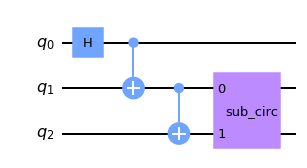

In [4]:
"Composite Gates"
#qu'est ce que ça pourrait être ? 

# Build a sub-circuit
#on créé un registre avec 2 entrées
sub_q = QuantumRegister(2)
#on créé le circuit quantique de base
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
#on ajoute une porte h sur l'entrée 0
sub_circ.h(sub_q[0])


#on ajoute une porte crz sur |0> puis |1>, qu'est ce que c'est ?
""" theta: The angle of the rotation.
    control_qubit: The qubit(s) used as the control.
    target_qubit: The qubit(s) targeted by the gate.
    label: The string label of the gate in the circuit.
    ctrl_state: The control state in decimal, or as a bitstring (e.g. '1').  Defaults to controlling on the '1' state."""

#L'angle de rotation est 1 , le bit de contrôle est sub_q[0] , le bit cible est sub_q[1]
sub_circ.crz(1, sub_q[0], sub_q[1])

#on ajoute une barrière #elle peut être vue dans la version décomposée 
#sub_circ.barrier()
#on ajoute un id ?

#on ajoute une porte identité
sub_circ.id(sub_q[1])

#on ajoute une porte u 
sub_circ.u(1, 2, -2, sub_q[0])



# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw('mpl')

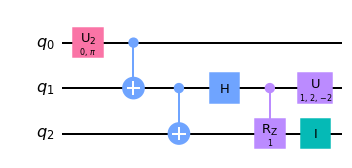

In [5]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw('mpl')

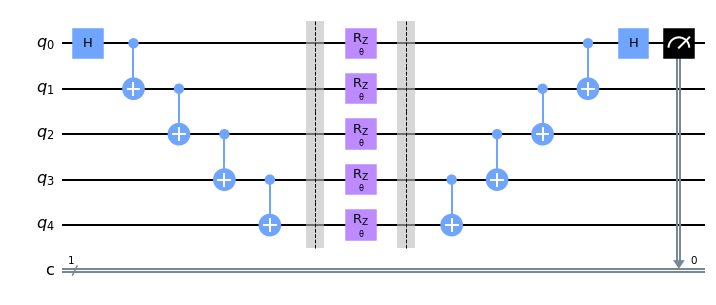

In [6]:
"Parametrized circuits"
"""circuit avec un ou des paramêtres"""

from qiskit.circuit import Parameter

#on ajoute un paramêtre qui est theta
theta = Parameter('θ')

n = 5

#circuit quantique avec 5 entrées et un état ?  
qc = QuantumCircuit(5, 1)

#application d'une porte hadamard
qc.h(0)
for i in range(n-1):
    #controlled X (CNOT) appiquée à tous les états n de 0 à 4
    qc.cx(i, i+1)

#une barriere
qc.barrier()

#rotation theta selon l'axe z
qc.rz(theta, range(5))

#barrière
qc.barrier()


for i in reversed(range(n-1)):
    qc.cx(i, i+1)

#porte hadamard
qc.h(0)

#mesure
qc.measure(0, 0)

qc.draw('mpl')


In [7]:
print(qc.parameters)

ParameterView([Parameter(θ)])


In [8]:
"Binding parameters to values = relier les paramêtres aux valeurs "

'Binding parameters to values = relier les paramêtres aux valeurs '

All circuit parameters must be bound before sending the circuit to a backend. This can be done as follows:
- The `bind_parameters` method accepts a dictionary mapping `Parameter`s to values, and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported, in which case the returned circuit will be parameterized by any `Parameter`s that were not mapped to a value.

la méthode 'bind_parameters'  accepte un dictionaire comme valeur en 'parameter' et retourne un nouveau circuit avec chaque paramètre remplacé par sa valeurs correspondante. le "binding" partiel est supporté, dans ce cas le circuit retourné va être paramétré par n'importe quel 
EXEMPLE ??? Je ne comprends pas 

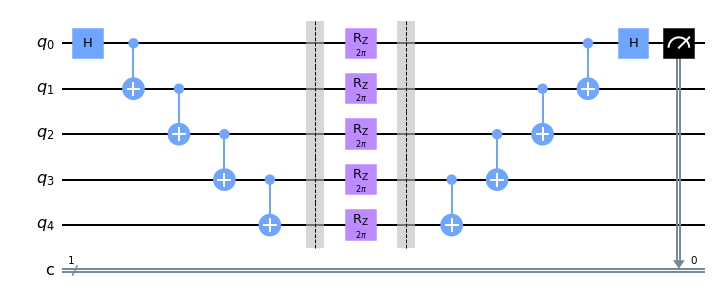

In [9]:
import numpy as np

#Ici theta est un intervalles de de valeurs entre 0 et 2pi
#dans ce cas là pourquoi on voit que des 2pi sur le circuit ?
theta_range = np.linspace(0, 2 * np.pi, 128)

#le circuit quantique est une liste en compréhension du circuit quantique où l'on remplace tous les theta
#toutes les valeurs de that sont remplacées par une valeurs comprise dans l'intervalle theta_range
#bind_parmaters permet de modifier les paramêtre directement dans le circuit
#Et si on a plusieurs paramêtres ?
circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw('mpl')

In [10]:
from qiskit import IBMQ

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

configrc.store_credentials:WARNING:2022-07-19 15:00:55,273: Credentials already present. Set overwrite=True to overwrite.


In [82]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-sherbrooke', group='udes', project='eibmq-iq')>]

In [86]:
provider_sherbrooke= IBMQ.get_provider(hub='ibm-q-sherbrooke', group='udes', project='eibmq-iq')
provider_local = Aer 

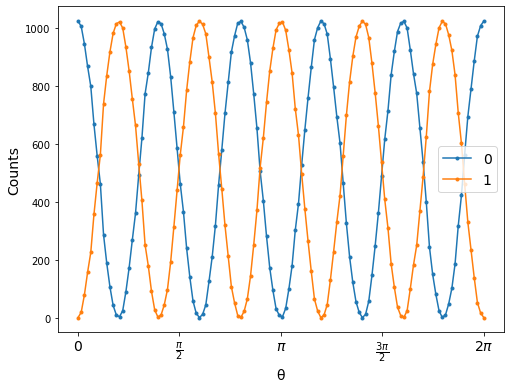

In [97]:
#backend = c'est la machine sur lequel on va rouler le code
#BasicAer est la machine Basic Aer
#qasm_simulator est un des simulateurs que l'on peut choisir
backend = BasicAer.get_backend('qasm_simulator')
#job associe le circuit à un backend sur lequel il peut rouler
job = backend.run(transpile(circuits, backend))
#counts 
counts = job.result().get_counts()


"""CREATION D'UN GRAPHIQUE"""
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1') 

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)